<a href="https://colab.research.google.com/github/deepu-san/DataScience/blob/main/Assignment8_Deepu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score


# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [3]:
df = pd.read_csv("car_data.csv")

In [ ]:
df.shape

(804, 12)

In [ ]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [ ]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [ ]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
X=df[["Mileage"]]
y=df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)#,random_state=2)

reg1 = LinearRegression()
reg1.fit(X_train,y_train)

m=reg1.coef_[0]
c=reg1.intercept_

print("Linear Regression Equation: y = {} * x + {}".format(m,c))

y_pred=reg1.predict(X_test)

Linear Regression Equation: y = -0.21301329854777273 * x + 25202.601200854155


In [ ]:
print('R2- SCORE:', reg1.score(X_test,y_test))

R2- SCORE: -0.03958040137554386


In [ ]:
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.03207489608893954


Text(0, 0.5, 'Price')

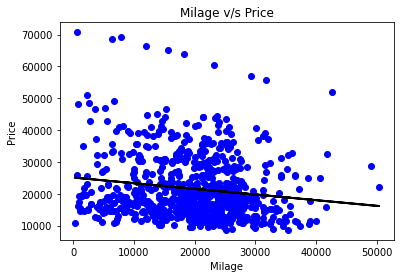

In [ ]:
plt.scatter(X,y, color="blue")
plt.plot(X, reg1.predict(X), color="black", linewidth=2)
plt.title('Milage v/s Price')
plt.xlabel('Milage')
plt.ylabel('Price')

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.



In [ ]:
X=df[["Mileage", "Cylinder", "Liter", "Doors", "Cruise", "Sound", "Leather"]]
y=df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)#,random_state=2)

reg2 = LinearRegression()
reg2.fit(X_train,y_train)

scores=cross_val_score(reg2,X_train,y_train,cv=10)

print("R2  score :", np.mean(scores))
#y_pred=reg2.predict(X_test)

R2  score : 0.3620403848808583


Here the $R^2$ score is considerably less compared to 0.8. Hence this equation is not a good fit for the data.

In [ ]:
m=reg2.coef_
c=reg2.intercept_
print("Coeffs :",*m)
print("Intercept :",c)

Coeffs : -0.16391438763615665 3015.493053241059 -96.83650914040447 -1365.8824721506144 6318.414307128537 -2211.2000811454477 3544.067009843183
Intercept : 7828.497153477103


In [ ]:
#print("R2  score :",  reg2.score(X_test,y_test))

R2  score : 0.4890122612883816


3. Find the combination of the factors that is the best predictor for price.


In [ ]:
import itertools
from sklearn.model_selection import cross_val_score

features=["Mileage", "Cylinder", "Liter", "Doors", "Cruise", "Sound", "Leather"]

#r2={}
max=0
l=[]

for feature in range(0, len(features)+1):
    for comb in itertools.combinations(features, feature): #Gives us all combination of features
        if (len(comb)>0): # To remove the combination which does not contain any features
            X=df[list(comb)]
            
            y= df["Price"]

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)#, random_state=5)

            regressor = LinearRegression() 
            regressor.fit(X_train,y_train)

            scores=cross_val_score(regressor,X_train,y_train,cv=10)
           
            #print('R2-SCORE for',comb,"is :", metrics.r2_score(y_test,y_pred))

            if(np.mean(scores)>max):
                max=np.mean(scores)
                l=list(comb)


#print(r2)
print("The highest R2 score is for combinaton ",l,"with a score of ", max) 

The highest R2 score is for combinaton  ['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound'] with a score of  0.4234393407664626


## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [4]:
df_test=df[["Make","Model","Type","Price"]]
df_grp=df_test.groupby(["Make","Type"]).mean()
df_grp

Price
Make      Type                     
Buick     Sedan        20815.113883
Cadillac  Convertible  62938.736572
          Sedan        37793.135287
Chevrolet Convertible  41501.592957
          Coupe        17933.203409
          Hatchback    14170.927809
          Sedan        14859.824290
Pontiac   Coupe        19317.108812
          Sedan        18954.002401
          Wagon        15881.386094
SAAB      Convertible  33239.399902
          Sedan        27573.284345
          Wagon        29016.179999
Saturn    Coupe        14413.444263
          Sedan        13761.489209

Groupby based in the models and get average price. Plot in sorted manner.

In [20]:
df2 = pd.get_dummies(df, columns=["Make","Type"],drop_first=True)
df2.drop(["Trim"],axis=1,inplace=True)

[Text(0, 0.5, 'Price')]

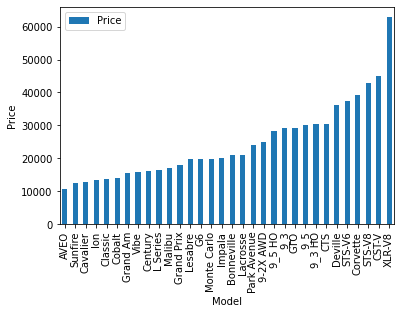

In [ ]:
df_test=df[["Model","Price"]]
df_grp=df_test.groupby(["Model"]).mean()
#df_grp.reset_index()
df_grp.sort_values(by=['Price'],inplace=True,ascending=True)

ax=df_grp.plot.bar()
ax.set(ylabel="Price")


Since there is a linear trend here between Models and price we can labe encode them. Getting dummy variable for 'Model' feature by one-hot encoding will add 32 more coloumns/dimension to our dataset. This can be avoided by label encoding as there is clearly an order visible here

In [5]:
df["Model"].unique()

array(['Century', 'Lacrosse', 'Lesabre', 'Park Avenue', 'CST-V', 'CTS',
       'Deville', 'STS-V6', 'STS-V8', 'XLR-V8', 'AVEO', 'Cavalier',
       'Classic', 'Cobalt', 'Corvette', 'Impala', 'Malibu', 'Monte Carlo',
       'Bonneville', 'G6', 'Grand Am', 'Grand Prix', 'GTO', 'Sunfire',
       'Vibe', '9_3', '9_3 HO', '9_5', '9_5 HO', '9-2X AWD', 'Ion',
       'L Series'], dtype=object)

In [22]:
#Label Encoding
df2["Model"] = df2["Model"].replace({'AVEO':0,
                                     'Sunfire':1,
                                     'Century':8,
                                     'Lacrosse':17, 
                                     'Lesabre':12, 
                                     'Park Avenue':18, 
                                     'CST-V':30,
                                     'CTS':25,
                                     'Deville':26,
                                     'STS-V6':27,
                                     'STS-V8':29,
                                     'XLR-V8':31,                                     
                                     'Cavalier':2,
                                     'Classic':4,
                                     'Cobalt':5,
                                     'Corvette':28,
                                     'Impala':15,
                                     'Malibu':10, 
                                     'Monte Carlo':14,
                                     'Bonneville':16,
                                     'G6':13,
                                     'Grand Am':6,
                                     'Grand Prix':11,
                                     'GTO':22,                                     
                                     'Vibe':7,
                                     '9_3':21,
                                     '9_3 HO':24,
                                     '9_5':23,
                                     '9_5 HO':20,
                                     '9-2X AWD':19,
                                     'Ion':3,
                                     'L Series':9})


In [27]:
target="Price"
X = df2.drop(target,axis=1) 
#y = df2[target]


Scince there are 16 features to be dealt with now. We have to look at $2^{16}$ combination of features now. This would therefore be a really time consuming process.

In [25]:
list(X)

['Mileage',
 'Model',
 'Cylinder',
 'Liter',
 'Doors',
 'Cruise',
 'Sound',
 'Leather',
 'Make_Cadillac',
 'Make_Chevrolet',
 'Make_Pontiac',
 'Make_SAAB',
 'Make_Saturn',
 'Type_Coupe',
 'Type_Hatchback',
 'Type_Sedan',
 'Type_Wagon']

In [26]:
import itertools
#from sklearn.model_selection import cross_val_score

#features=["Mileage", "Cylinder", "Liter", "Doors", "Cruise", "Sound", "Leather"]
features=list(X)

#r2={}
max=0
l=[]

for feature in range(0, len(features)+1):
    for comb in itertools.combinations(features, feature): #Gives us all combination of features
        if (len(comb)>0): # To remove the combination which does not contain any features
            X=df2[list(comb)]
            
            y= df["Price"]

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

            regressor = LinearRegression() 
            regressor.fit(X_train,y_train)

            # scores=cross_val_score(regressor,X_train,y_train,cv=10)
            # print(np.mean(scores))
            # print(scores.mean())

            y_pred = regressor.predict(X_test)

            #r2[(comb)]=metrics.r2_score(y_test,y_pred)
            #print('R2-SCORE for',comb,"is :", metrics.r2_score(y_test,y_pred))

            if(metrics.r2_score(y_test,y_pred)>max):
                max=metrics.r2_score(y_test,y_pred)
                l=list(comb)


#print(r2)
print("The highest R2 score is for combinaton ",l,"with a score of ", max) 

The highest R2 score is for combinaton  ['Mileage', 'Model', 'Cylinder', 'Liter', 'Doors', 'Sound', 'Leather', 'Make_Cadillac', 'Make_Chevrolet', 'Make_SAAB', 'Make_Saturn', 'Type_Coupe', 'Type_Wagon'] with a score of  0.9425921727516677


['Mileage', 'Model', 'Cylinder', 'Liter', 'Doors', 'Sound', 'Leather', 'Make_Cadillac', 'Make_Chevrolet', 'Make_SAAB', 'Make_Saturn', 'Type_Coupe', 'Type_Wagon'] is the best combinarion of features which yielded a $R^2$ score of 0.942